In [1]:
import sys
from pathlib import Path


sys.path.append(str(Path().resolve().parent / "src")) # Add src to path for imports


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from config import PROCESSED_PATH 

In [3]:
df = pd.read_csv(PROCESSED_PATH) # Load the processed dataset
df.info()
df['Gender'].describe() # Quick stats on Gender column
df['satisfaction'].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [8]:
# Check unique values to understand categories
print(df['Gender'].unique())
print(df['satisfaction'].unique())


['Female' 'Male']
['satisfied' 'neutral or dissatisfied']


In [10]:
# Create a pivot table (counts of satisfaction by gender)
pivot_table = pd.crosstab(df['Gender'], df['satisfaction'])

print(pivot_table)


satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                           7437       5735
Male                             7136       5668


In [11]:
# Convert counts to percentages (row-wise)
pivot_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

print(pivot_percent)


satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      56.460674  43.539326
Male                        55.732584  44.267416


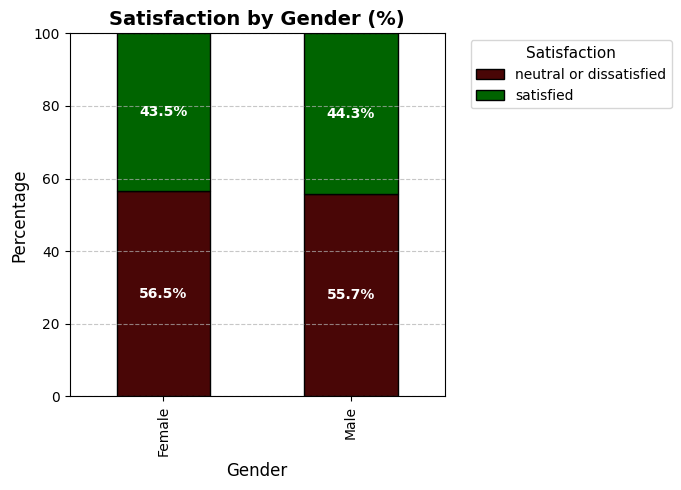

In [34]:
# Profesyonel stacked bar chart
ax = pivot_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(7, 5),
    color={
        "satisfied": "#006400",                # koyu yeşil
        "neutral or dissatisfied": "#490606"   # koyu kırmızı
    },
    edgecolor="black"  # barların sınır çizgisi, raporda netlik sağlar
)

# Başlık ve etiketler
plt.title("Satisfaction by Gender (%)", fontsize=14, fontweight="bold")
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.ylim(0, 100)

# Grid ekle (sadece yatay, ince gri çizgiler)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Yüzdeleri barların içine yaz
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f%%",
        label_type="center",
        color="white",
        fontsize=10,
        fontweight="bold"
    )

# Legend dışarıda, okunur şekilde
plt.legend(
    title="Satisfaction",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=10,
    title_fontsize=11
)

plt.tight_layout()
plt.show()


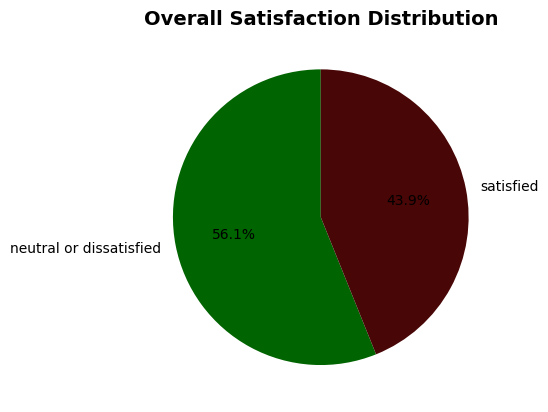

In [30]:
# Total satisfaction distribution (all genders combined)
total_counts = df['satisfaction'].value_counts()

plt.pie(
    total_counts,
    labels=total_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#006400", "#490606"],  # koyu yeşil, koyu kırmızı
    textprops={'fontsize': 10, 'color': 'black'}  # yazılar siyah, okunur
)

plt.title("Overall Satisfaction Distribution", fontsize=14, fontweight="bold")
plt.show()


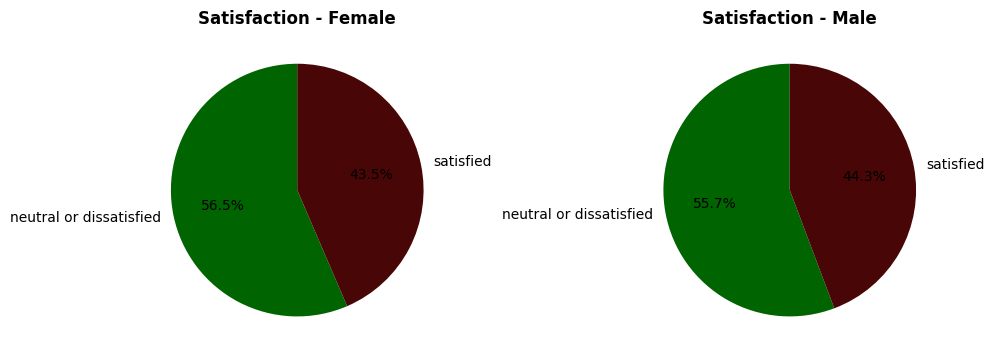

In [33]:
fig, axes = plt.subplots(1, len(genders), figsize=(10, 5))

if len(genders) == 1:
    axes = [axes]

for i, gender in enumerate(genders):
    subset = df[df['Gender'] == gender]
    counts = subset['satisfaction'].value_counts()
    
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["#006400", "#490606"],  # koyu yeşil, koyu kırmızı
        textprops={'fontsize': 10, 'color': 'black'}  # label okunurluğu
    )
    axes[i].set_title(f"Satisfaction - {gender}", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
